# Euler mejorado

## Iniciar paquetes del programa
Usamos la biblioteca **pandas** para mostrar resultados en tablas.

Usamos **matplotlib** para mostrar funcion en grafico.

**Numpy** para guardar los arreglos numericos.
**Math** si tenemos que utilizar operaciones de esta biblioteca.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Definir función diferencial
Definimos la función diferencial que aproximaremos mediante el método. Usamos parametros **x** e **y**.


⚠**IMPORTANTE** ⚠:

Si la funcion que vamos a aproximar no contiene parametro **y**, la opcion recomendada es darle valor aleatorio en el algoritmo (ya viene así por defecto).

In [2]:
def funcion(x:float,y:float):
    return 2*x

## Asignar valores iniciales
Asignamos el valor de h (diferencial de x), y valores iniciales de x e y.

También hay que asignar la cantidad de iteraciones que queremos.



In [40]:
# Iteraciones:
i = 5

# Diferencial de x
h = .1

# X e Y iniciales:
x0 = 0
y0 = 0

## Ejecución del algoritmo

In [41]:
# Listas para utilizar en dataframe y grafico

# La lista x_i contiene todos los x_i a usar, desde antes de comenzar a iterar
# Los obtenemos a partir del metodo linspace de numpy
# Los parametros son: np.linspace(inicio,fin,cantidad_de_valores)
# El parametro *fin* se incluye en el arreglo
x_i = np.linspace(x0,x0 + i*h,i)

# MUCHO CUIDADO: creamos un np array "empty", que en realidad contiene numeros aleatorios
# Hay que asegurarse de sobreescribir todos durante la iteracion
y_i = np.empty(i)

# Arreglo de error aproximado (lleno de ceros al principio)
error = np.zeros(i)


# ---------------------------------------------------------------------


# Iteracion

for n in range(i):
    
    # Usamos la funcion general
    if n == 0:
        # Operamos con la formula de euler tradicional
        # Nuestra funcion por defecto no tiene parametro y, asi que le asignamos 0 en ese parametro
        y_i[n] = y0 + h * funcion(x_i[n],0)
    else:
        # Operamos con la formula de euler mejorado
        y_i[n] = y_i[n-1] + h * (funcion(x_i[n],0) + funcion(x_i[n-1],0)) / 2

        # Asignamos el error aproximado
        error[n] = math.fabs(100 * (y_i[n] - y_i[n-1]) / y_i[n])   
      
    # Reasignamos el proximo valor yi (o yi-1 segun la notacion)


# Inicializamos el dataframe que llenaremos con datos de la iteracion
# El metodo np.around redondea a la cantidad de decimales del segundo parametro

df = pd.DataFrame({
    'x': np.around(x_i,3),
    'y': np.around(y_i,3),
    'error aprox': np.around(error,3)
})

# Mostramos resultado
print(df)

       x      y  error aprox
0  0.000  0.000        0.000
1  0.125  0.012      100.000
2  0.250  0.050       75.000
3  0.375  0.112       55.556
4  0.500  0.200       43.750


## Mostramos gráfico 📈
Ejecutar el codigo para ver gráficamente el resultado

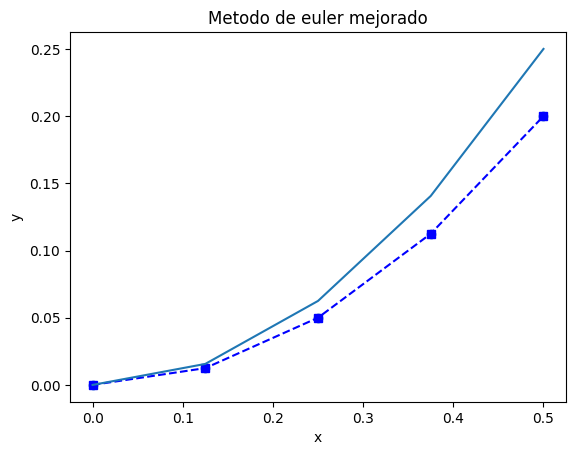

In [43]:
plt.title('Metodo de euler mejorado')
plt.xlabel('x')
plt.ylabel('y')

## Puntos
plt.scatter(x_i,y_i)
# Union de los puntos
plt.plot(x_i,y_i,'s--b')


# En este caso, se puede comparar la grafica de la aproximacion 
# con la grafica de la funcion primitiva si es facil de resolver.
# Si ese es el caso, quitarle el comentario a la linea de abajo, e ingresar en el
# segundo parametro la funcion en cuestion, que por defecto es x_i**2

# plt.plot(x_i,x_i**2)